In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Earthquakes

In [2]:
eq = pd.read_csv('earthquake.txt', sep=' ')

In [27]:
eq_1 = eq[eq['popn'] == 'equake'].iloc[:, 1:]
eq_0 = eq[eq['popn'] == 'explosn'].iloc[:, 1:]

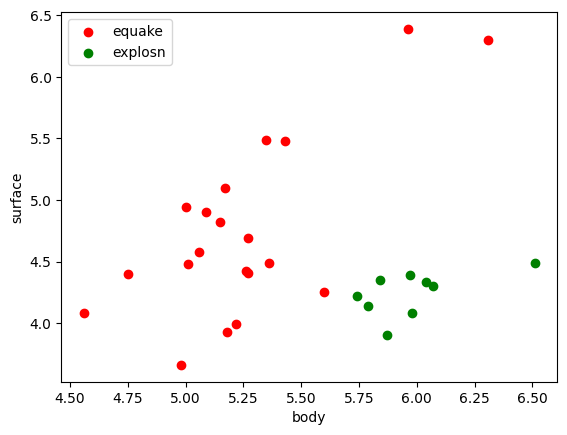

In [37]:
plt.scatter(eq_1.iloc[:, 0], eq_1.iloc[:, 1], color='red')
plt.scatter(eq_0.iloc[:, 0], eq_0.iloc[:, 1], color='green')
plt.legend(['equake', 'explosn'])
plt.xlabel(eq_1.columns[0])
plt.ylabel(eq_1.columns[1])
plt.show()

In [49]:
X = eq.to_numpy()[:, 1:]
y = (eq.to_numpy()[:, 0] == 'equake').astype(int)

lr_raw = LogisticRegression(penalty=None)
lr_raw.fit(X, y)

lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_l1.fit(X, y)

lr_l2 = LogisticRegression(penalty='l2')
lr_l2.fit(X, y)

LogisticRegression()

In [61]:
def plot_decision(model, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict the class for each point in the grid
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision regions
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlGn_r)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlGn_r)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions of {model_name}')
    plt.show()

In [93]:
def print_info(model, model_name):
    print(f'Intercept: {model.intercept_}')
    print(f'Coefficients: {model.coef_}')
    df = pd.DataFrame({'prediction': model.predict(X),'proba': model.predict_proba(X)[:, 1]})
    print(df)

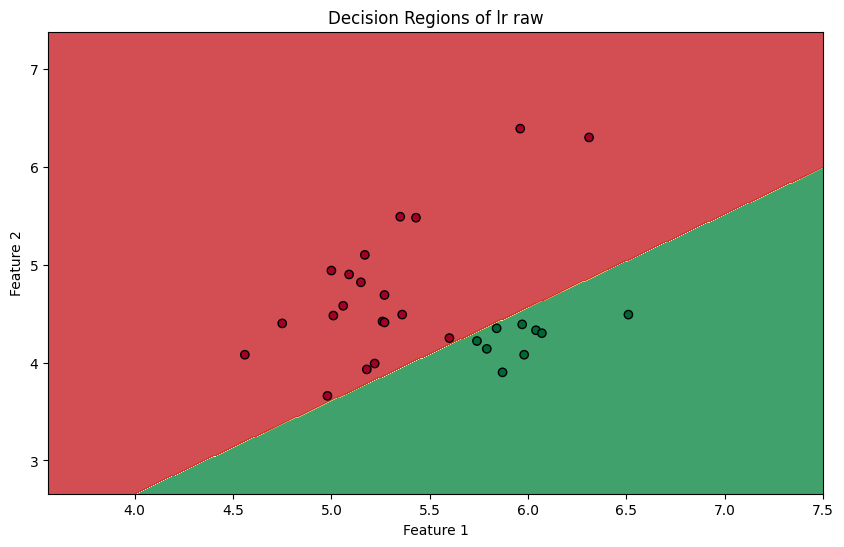

In [62]:
plot_decision(lr_raw, 'lr raw')

In [94]:
print_info(lr_raw, 'lr_raw')

Intercept: [135.04765908]
Coefficients: [[-111.91608035  117.54515973]]
    prediction         proba
0            1  9.996236e-01
1            1  1.000000e+00
2            1  1.000000e+00
3            1  1.000000e+00
4            1  1.000000e+00
5            1  1.000000e+00
6            1  1.000000e+00
7            1  1.000000e+00
8            1  1.000000e+00
9            1  1.000000e+00
10           1  1.000000e+00
11           1  1.000000e+00
12           1  9.996370e-01
13           1  1.000000e+00
14           1  1.000000e+00
15           1  1.000000e+00
16           1  1.000000e+00
17           1  1.000000e+00
18           1  1.000000e+00
19           1  1.000000e+00
20           0  1.324807e-14
21           0  3.867434e-08
22           0  7.306790e-04
23           0  3.749177e-12
24           0  2.714949e-28
25           0  2.791868e-29
26           0  1.224883e-05
27           0  1.888518e-24
28           0  1.356876e-17


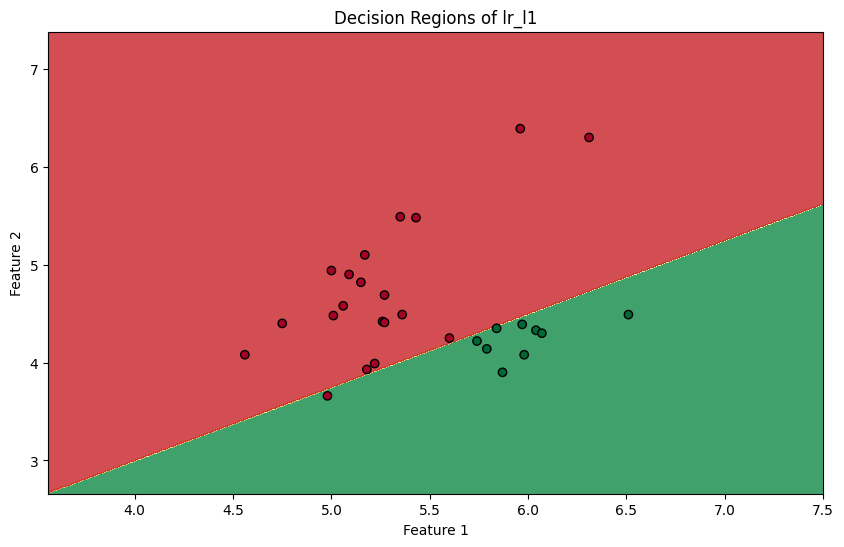

(array([[-111.91608035,  117.54515973]]), array([135.04765908]))

In [67]:
plot_decision(lr_l1, 'lr_l1')

In [95]:
print_info(lr_l1, 'lr_l1')

Intercept: [0.]
Coefficients: [[-1.98992089  2.65564612]]
    prediction     proba
0            1  0.535674
1            1  0.532180
2            1  0.984845
3            1  0.778660
4            1  0.993998
5            1  0.780909
6            1  0.962885
7            1  0.903149
8            1  0.980799
9            1  0.873005
10           1  0.772857
11           1  0.877407
12           0  0.452607
13           1  0.551972
14           1  0.890305
15           1  0.947048
16           1  0.927716
17           1  0.853334
18           1  0.959662
19           1  0.976970
20           0  0.372811
21           0  0.444840
22           0  0.482738
23           0  0.371155
24           0  0.210184
25           0  0.262981
26           0  0.446377
27           0  0.256414
28           0  0.340843


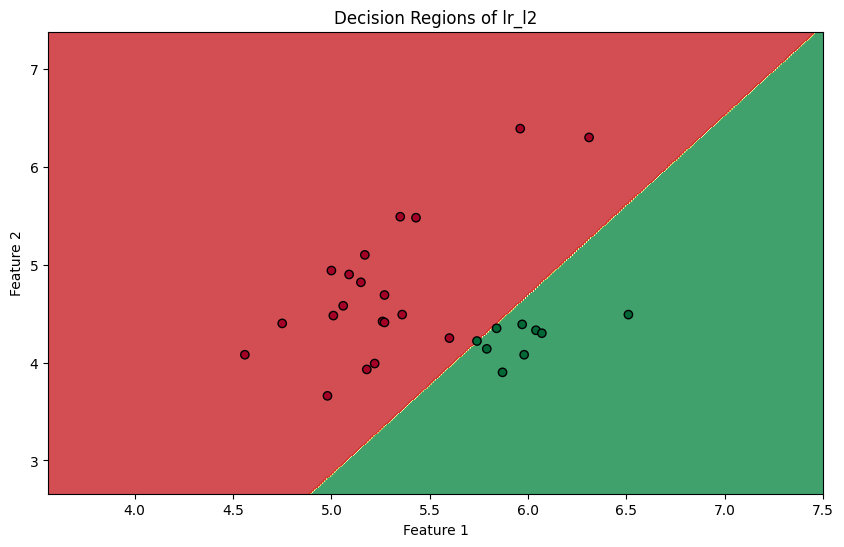

In [64]:
plot_decision(lr_l2, 'lr_l2')

In [96]:
print_info(lr_l2, 'lr_l2')

Intercept: [7.46937734]
Coefficients: [[-2.16922885  1.18171354]]
    prediction     proba
0            1  0.585157
1            1  0.706181
2            1  0.773177
3            1  0.759183
4            1  0.890116
5            1  0.782859
6            1  0.907308
7            1  0.914125
8            1  0.913062
9            1  0.869395
10           1  0.777109
11           1  0.829173
12           1  0.729421
13           1  0.702878
14           1  0.870493
15           1  0.901890
16           1  0.880135
17           1  0.916758
18           1  0.921355
19           1  0.897178
20           0  0.373801
21           0  0.427221
22           0  0.485388
23           0  0.450621
24           0  0.341793
25           0  0.206458
26           1  0.501209
27           0  0.335989
28           0  0.350584


## Simulation

In [170]:
n = 50
d = 5
L = 10000

In [171]:
mse_list = []
for i in range(L):
    X = np.random.multivariate_normal(mean=np.zeros(5), cov=np.eye(d), size=n)
    p = 1 / (1 + np.exp(-(0.5 + X.sum(axis=1))))
    y = np.random.binomial(1, p)
    lr = LogisticRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)
    coef, intercept = lr.coef_, lr.intercept_
    mse = (0.5 - intercept)**2 + np.sum((intercept - 1)**2)
    mse_list.append(mse)

In [172]:
np.mean(mse_list)

np.float64(0.572971991996804)